In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cc_train=pd.read_csv(r"C:/Users/Admin/Downloads/counterfeit_train.csv")

In [3]:
cc_test=pd.read_csv(r"C:/Users/Admin/Downloads/counterfeit_test.csv")

In [4]:
cc_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [5]:
cc_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [6]:
cc_test['Counterfeit_Sales']=np.nan
cc_train['data']='train'
cc_test['data']='test'
cc_test=cc_test[cc_train.columns]
cc=pd.concat([cc_train,cc_test],axis=0)

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          8523 non-null   object 
 1   Counterfeit_Weight   7060 non-null   float64
 2   DistArea_ID          8523 non-null   object 
 3   Active_Since         8523 non-null   int64  
 4   Medicine_MRP         8523 non-null   float64
 5   Medicine_Type        8523 non-null   object 
 6   SidEffect_Level      8523 non-null   object 
 7   Availability_rating  8523 non-null   float64
 8   Area_Type            8523 non-null   object 
 9   Area_City_Type       8523 non-null   object 
 10  Area_dist_level      8523 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
 12  data                 8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [8]:
cc.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

In [9]:
cc.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,6818.000000
mean,14.157645,1995.831867,151.292782,0.079132,2280.583480
std,4.643456,8.371760,62.275067,0.051598,1693.354404
min,5.855000,1983.000000,41.590000,0.013000,146.290000
25%,10.073750,1985.000000,104.126500,0.039989,933.265600
50%,13.900000,1997.000000,153.312800,0.066931,1902.670400
75%,18.150000,2002.000000,195.943700,0.107585,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


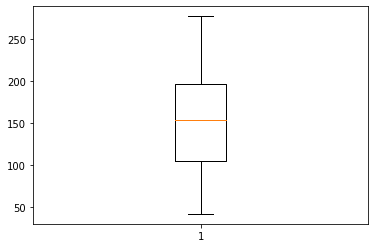

In [10]:
plt.boxplot(cc['Medicine_MRP'])
plt.show()

In [11]:
cc.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [12]:
cc.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train


In [13]:
cc['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area035    930
Area046    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [14]:
cat_vars=cc.select_dtypes(['object']).columns

In [15]:
for col in cc.select_dtypes(["object"]).columns:
  print(col,":",cc[col].nunique())

Medicine_ID : 1557
DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4
data : 2


In [16]:
cc.drop(['Area_dist_level'],axis=1,inplace=True)

In [17]:
for col in cc.select_dtypes(["object"]).columns:
  print(col,":",cc[col].value_counts())

Medicine_ID : SGZ11    12
GVZ23    10
ORS21    10
KIS14    10
QIN25     9
         ..
UKN13     1
YDD11     1
ETU15     1
PIG89     1
FVS71     1
Name: Medicine_ID, Length: 1557, dtype: int64
DistArea_ID : Area027    935
Area013    932
Area035    930
Area046    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64
Medicine_Type : Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64
SidEffect_Level : mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64
Area_Type : DownTown              5577
Mid

In [18]:
cc.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,158.9402,train


In [19]:
cat_vars=cc.select_dtypes(['object']).columns
cat_vars

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level',
       'Area_Type', 'Area_City_Type', 'data'],
      dtype='object')

In [20]:
for col in cat_vars[:-1]:
    dummy=pd.get_dummies(cc[col],drop_first=True,prefix=col)
    cc=pd.concat([cc,dummy],axis=1)
    del cc[col]
    print(col)
del dummy



Medicine_ID
DistArea_ID
Medicine_Type
SidEffect_Level
Area_Type
Area_City_Type


In [21]:
cc.shape

(8523, 1592)

In [22]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Columns: 1592 entries, Counterfeit_Weight to Area_City_Type_Tier 3
dtypes: float64(4), int64(1), object(1), uint8(1586)
memory usage: 13.3+ MB


In [23]:
cc.isnull().sum()

Counterfeit_Weight              1463
Active_Since                       0
Medicine_MRP                       0
Availability_rating                0
Counterfeit_Sales               1705
                                ... 
Area_Type_DownTown                 0
Area_Type_Industrial               0
Area_Type_MidTownResidential       0
Area_City_Type_Tier 2              0
Area_City_Type_Tier 3              0
Length: 1592, dtype: int64

In [24]:
for col in cc.columns:
    if(cc[col].isnull().sum()>0):
        print(col) 

Counterfeit_Weight
Counterfeit_Sales


In [25]:
cc['Counterfeit_Weight'].fillna(cc['Counterfeit_Weight'].mean(), inplace=True)
cc['Counterfeit_Sales'].fillna(cc['Counterfeit_Sales'].mean(), inplace=True)

In [26]:
cc_train=cc[cc['data']=='train']
del cc_train['data']

In [27]:
cc_test=cc[cc['data']=='test']
cc_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# LINEAR REGRESSION


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
cc_train1,cc_train2=train_test_split(cc_train,test_size=0.2,random_state=2)

In [30]:
x_train1=cc_train1.drop('Counterfeit_Sales',axis=1) # Feature Dataset
y_train1=cc_train1['Counterfeit_Sales'] # Target dataset

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train1,y_train1)

In [ ]:
lm.intercept_

In [ ]:
list(zip(x_train1.columns,lm.coef_))

In [ ]:
x_train2=cc_train2.drop('Counterfeit_Sales',axis=1)

In [ ]:
predicted_ir=lm.predict(x_train2)

In [ ]:
print(predicted_ir[:10])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(cc_train2['Counterfeit_Sales'],predicted_ir)

In [ ]:
/1660)
Score

In [ ]:
x_train=cc_train.drop('Counterfeit_Sales',axis=1)
y_train=cc_train['Counterfeit_Sales']

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
lm.intercept_

In [ ]:
test_pred=lm.predict(cc_test)
test_pred

# RANDOM FOREST

In [31]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
x_train=cc_train.drop(['Counterfeit_Sales'], axis=1)
y_train= cc_train['Counterfeit_Sales']

In [34]:
rfr = RandomForestRegressor( random_state=42)

In [35]:
param_dist={'max_depth': range(3,7),
            'n_estimators': (10, 50,15,20,25)}

In [36]:
n_iter_search=10
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist,n_iter=n_iter_search,scoring='neg_mean_squared_error',cv=10,verbose=20)


In [37]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=20, max_depth=6, score=-1042205.361, total=  15.0s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1177836.195, total=  14.6s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.5s remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1135428.295, total=  14.4s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.0s remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1115109.512, total=  14.4s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   58.3s remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1399756.243, total=  14.7s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1109409.264, total=  14.6s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1059450.304, total=  14.6s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1096133.227, total=  14.5s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1211149.815, total=  14.3s
[CV] n_estimators=20, max_depth=6 ....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min remaining:    0.0s


[CV] . n_estimators=20, max_depth=6, score=-1145175.683, total=  14.5s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1075754.185, total=  11.4s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.6min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1197366.207, total=  11.4s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.8min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1143295.363, total=  11.4s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  3.0min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1125252.337, total=  11.3s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  3.2min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1407253.208, total=  11.3s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1124019.552, total=  11.5s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.6min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1077918.954, total=  11.3s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  3.8min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1129335.714, total=  11.0s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.9min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1264120.066, total=  11.5s
[CV] n_estimators=20, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  4.1min remaining:    0.0s


[CV] . n_estimators=20, max_depth=4, score=-1188475.171, total=  11.3s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1075494.465, total=  27.6s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1190543.969, total=  27.4s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1135253.173, total=  27.5s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1126697.181, total=  27.5s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1398871.593, total=  27.7s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] . n_estimators=50, max_depth=4, score=-1124910.410, total=  27.9s
[CV] n_estimators=50, max_depth=4 ....................................
[CV] .

[CV] . n_estimators=50, max_depth=3, score=-1168546.508, total=  10.1s
[CV] n_estimators=50, max_depth=3 ....................................
[CV] . n_estimators=50, max_depth=3, score=-1412874.660, total=  10.3s
[CV] n_estimators=50, max_depth=3 ....................................
[CV] . n_estimators=50, max_depth=3, score=-1236052.432, total=  10.4s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] . n_estimators=15, max_depth=5, score=-1040626.673, total=   4.5s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] . n_estimators=15, max_depth=5, score=-1173818.307, total=   4.6s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] . n_estimators=15, max_depth=5, score=-1127728.688, total=   4.5s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] . n_estimators=15, max_depth=5, score=-1110511.099, total=   4.8s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [38]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        # np.flatnonzero extracts index of `True` in a boolean array
        candidate = np.flatnonzero(results['rank_test_score'] == i)[0]
        # print rank of the model
        # values passed to function format here are put in the curly brackets when printing
        # 0 , 1 etc refer to placeholder for position of values passed to format function
        # .3f means upto 2 decimal digits
        print("Model with rank: {0}".format(i))
        # this prints cross validated performance and its standard deviation
        print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
        # prints the paramter combination for which this performance was obtained
        print("Parameters: {0}".format(results['params'][candidate]))
        print("")

In [40]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1146302.80403 (std: 94452.75081)
Parameters: {'n_estimators': 50, 'max_depth': 5}

Model with rank: 2
Mean validation score: -1147676.56833 (std: 95759.64947)
Parameters: {'n_estimators': 25, 'max_depth': 6}

Model with rank: 3
Mean validation score: -1147757.39569 (std: 97808.82751)
Parameters: {'n_estimators': 15, 'max_depth': 5}

Model with rank: 4
Mean validation score: -1149165.38973 (std: 96284.21060)
Parameters: {'n_estimators': 20, 'max_depth': 6}

Model with rank: 5
Mean validation score: -1168731.84108 (std: 93019.01741)
Parameters: {'n_estimators': 50, 'max_depth': 4}



In [41]:
rf=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [43]:
test_score=rf.predict(cc_test)

In [44]:
test_score

array([2331.28044107, 4025.36326272, 1542.74465902, ..., 2901.81017505,
       3866.10097093, 3974.10217985])

In [45]:
pd.DataFrame(test_score).to_csv("mysubmission12.csv",index=False)

In [50]:
cc_test2=pd.read_csv(r"C:/Users/Admin/Downloads/counterfeit_test.csv")

In [51]:
mid=cc_test2['Medicine_ID']

In [52]:
mid=pd.DataFrame(mid)

In [53]:
target=pd.DataFrame(test_score)

In [54]:
target=target.rename(columns={0:'Counterfeit_Sales'})

In [55]:
final=pd.concat([mid,target],axis=1)
final

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2331.280441
1,ECE94,4025.363263
2,SAD14,1542.744659
3,EQV63,376.348929
4,AIR10,370.855487
...,...,...
1700,KXW10,3324.558731
1701,CKE54,802.562238
1702,HAY13,2901.810175
1703,ZEE32,3866.100971


In [56]:
pd.DataFrame(final).to_csv("Shital_Shende_P3_sales.csv",index=False)